In [21]:
import lightkurve as lk
from astropy.timeseries import LombScargle
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt  
import gc
import sys
sys.path.append('../../GLS/python/')
from gls import Gls

In [2]:
resuluts =lk.search_lightcurvefile("TOI837")

/Users/masamasakobakoba/.pyenv/versions/miniconda3-4.7.12/lib/python3.7/site-packages/ipykernel_launcher.py:1: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  """Entry point for launching an IPython kernel.


In [3]:
resuluts

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 10,2019,SPOC,120,460205581,0.0
1,TESS Sector 10,2019,QLP,1800,460205581,0.0
2,TESS Sector 10,2019,CDIPS,1800,460205581,0.0
3,TESS Sector 10,2019,PATHOS,1800,460205581,0.0
4,TESS Sector 11,2019,SPOC,120,460205581,0.0
5,TESS Sector 11,2019,QLP,1800,460205581,0.0
6,TESS Sector 11,2019,CDIPS,1800,460205581,0.0
7,TESS Sector 11,2019,PATHOS,1800,460205581,0.0
8,TESS Sector 37,2021,SPOC,120,460205581,0.0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

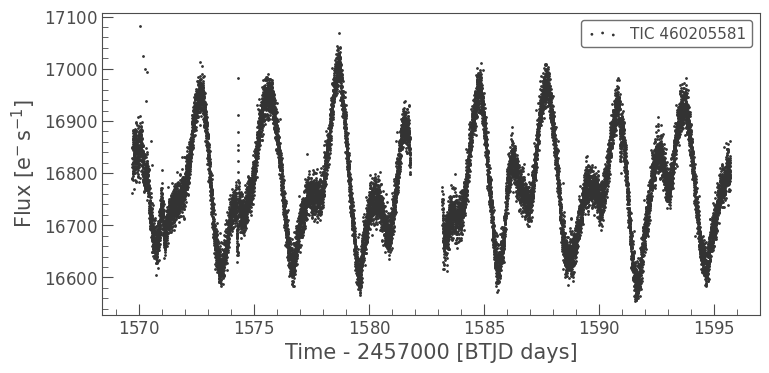

In [13]:
lc = resuluts[0].download()
lc.scatter()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

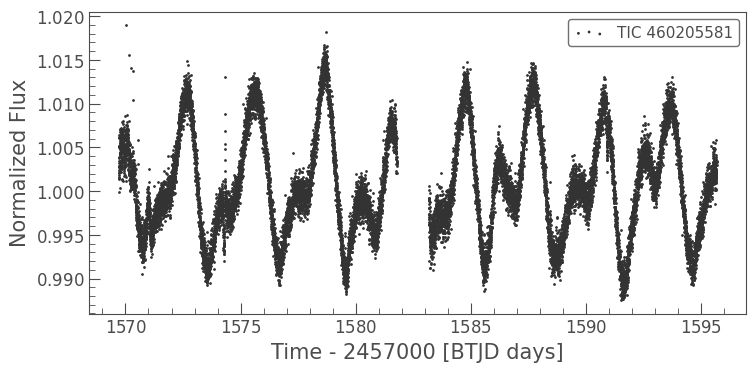

In [14]:
lc = lc.normalize().remove_nans()
lc.scatter()

In [26]:
##  LombScargle

In [7]:
t = lc.time
y = lc.flux
frequency, power = LombScargle(t, y).autopower(nyquist_factor=2)

(0.0, 4.0)

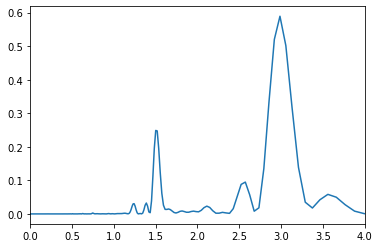

In [8]:
plt.plot(1/frequency, power)  
plt.xlim(0, 4)

In [12]:
period = (1/(frequency[np.argmax(power)]))
print(period)

2.985493738684851 d


In [25]:
## GLS

In [22]:
df = [lc.time.value, lc.flux.value, lc.flux_err.value]
gls = Gls(df, Pbeg=0.1, Pend=10)

In [23]:
gls.best

{'f': 0.33485208366111685,
 'P': 2.9863932428505904,
 'amp': 0.006382653199946163,
 'ph': 0.3059364144334744,
 'T0': 1568.795495846915,
 'offset': 1.000815346228361,
 'e_amp': 4.008349809825173e-05,
 'e_ph': 0.0009995039145797799,
 'e_T0': 0.0029849117367037685,
 'e_offset': 2.834331331895188e-05,
 'e_f': 0.0001838933336071454,
 'e_P': 0.0016400608975915391}

../../GLS/python/gls.py:496: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title('GLS periodogram')
../../GLS/python/gls.py:642: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


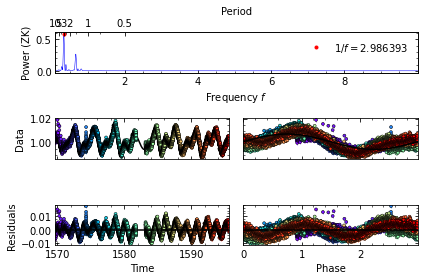

In [24]:
fig=gls.plot()